<a href="https://colab.research.google.com/github/yasmineJerbi03/Traffic-accidents-prediction/blob/main/Pr%C3%A9diction_des_accidents_pour_la_pr%C3%A9vention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1- Data Exploration**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/My Drive/accidents_2012_to_2014.csv')
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,201201BS70001,527200,178760,-0.169101,51.493429,1,3,2,1,19/01/2012,5,20:35,12,E09000020,3,308,Single carriageway,30,NaN,Automatic traffic signal,5,0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002821,2012
1,201201BS70002,524930,181430,-0.200838,51.517931,1,3,2,1,04/01/2012,4,17:00,1,E09000033,4,412,Single carriageway,30,NaN,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01004760,2012
2,201201BS70003,525860,178080,-0.188636,51.487618,1,3,2,1,10/01/2012,3,10:07,12,E09000020,3,3220,One way street,30,NaN,Giveway or uncontrolled,6,0,None within 50 metres,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002893,2012
3,201201BS70004,524980,181030,-0.200259,51.514325,1,3,1,1,18/01/2012,4,12:20,12,E09000020,5,0,Single carriageway,30,NaN,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002886,2012
4,201201BS70005,526170,179200,-0.183773,51.497614,1,3,1,1,17/01/2012,3,20:24,12,E09000020,4,325,Single carriageway,30,NaN,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002890,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464692,2.01E+12,310037,597647,-3.417278,55.264773,98,2,2,1,07/12/2014,1,22:20,917,S12000006,2,74,Dual carriageway,70,NaN,NaN,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes,NaN,2014
464693,2.01E+12,321509,574063,-3.230255,55.054855,98,3,2,2,11/12/2014,5,06:40,917,S12000006,2,74,Dual carriageway,70,NaN,NaN,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes,NaN,2014
464694,2.01E+12,321337,566365,-3.230826,54.985668,98,3,1,1,09/12/2014,3,02:00,917,S12000006,4,721,Single carriageway,40,NaN,NaN,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes,NaN,2014
464695,2.01E+12,323869,566853,-3.191397,54.990446,98,2,3,2,17/12/2014,4,06:55,917,S12000006,3,75,Single carriageway,60,NaN,Giveway or uncontrolled,5,43,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,NaN,2014


### Explication des attributs:
* LSOA_of_Accident_Location | Location_Easting_OSGR | Location_Northing_OSGR | 
* Longitude | Latitude | Urban_or_Rural_Area : Lieu de l'accident \\
* Police_Force : Identifiant du groupe de police \\
* Accident_Severity : Gravité de l'accident ( de 1 jusqu'à 3 avec une gravité croissante ) \\
* Number_of_Vehicles : Nombre de voitures \\
* Number_of_Casualties : Nombre de victimes \\
* Date | Day_of_Week | Year | Time : Temps de l'accident \\
* Local_Authority_(Highway) | Local_Authority_(District) | Did_Police_Officer_Attend_Scene_of_Accident : relative aux polices \\
* 1st_Road_Class | 1st_Road_Number | Road_Type | 2nd_Road_Class | 2nd_Road_Number : Details sur les rues \\
* Speed_limit : Limites de vitesse \\
* Pedestrian_Crossing-Human_Control | Pedestrian_Crossing-Physical_Facilities | Pedestrian_Crossing-Physical_Facilities | Light_Conditions : relatives au feux de circulation etc... \\
* Weather_Conditions | Road_Surface_Conditions | Special_Conditions_at_Site | Carriageway_Hazards : l'état de méteo et de surface       
      




In [ ]:
df.shape

(464697, 33)

In [ ]:
df.dtypes

Accident_Index                                  object
Location_Easting_OSGR                            int64
Location_Northing_OSGR                           int64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                       object
Speed_limit                                      int64
Junction_D

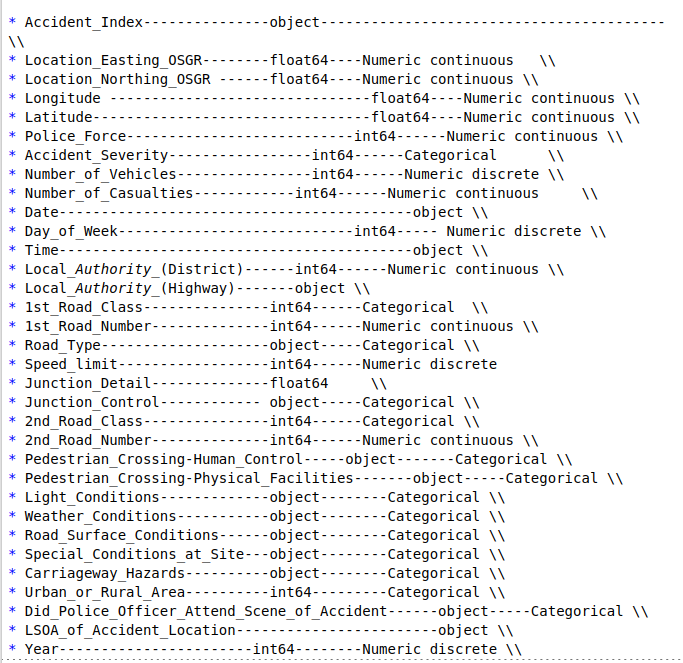

Attribut-------------Type---------------True type      \

---



---


* Accident_Index---------------object----------------------------------------- \\
* Location_Easting_OSGR--------float64----Numeric continuous   \\ 
* Location_Northing_OSGR ------float64----Numeric continuous \\
* Longitude -------------------------------float64----Numeric continuous \\
* Latitude---------------------------------float64----Numeric continuous \\
* Police_Force---------------------------int64------Numeric continuous \\
* Accident_Severity-----------------int64------Categorical      \\        
* Number_of_Vehicles----------------int64------Numeric discrete \\
* Number_of_Casualties------------int64------Numeric continuous     \\          
* Date------------------------------------------object \\
* Day_of_Week----------------------------int64----- Numeric discrete \\
* Time------------------------------------------object \\
* Local_Authority_(District)------int64------Numeric continuous \\
* Local_Authority_(Highway)-------object \\
* 1st_Road_Class---------------int64------Categorical  \\            
* 1st_Road_Number--------------int64------Numeric continuous \\
* Road_Type--------------------object-----Categorical \\             
* Speed_limit------------------int64------Numeric discrete
* Junction_Detail--------------float64     \\
* Junction_Control------------ object-----Categorical \\             
* 2nd_Road_Class---------------int64------Categorical \\
* 2nd_Road_Number--------------int64------Numeric continuous \\
* Pedestrian_Crossing-Human_Control-----object-------Categorical \\
* Pedestrian_Crossing-Physical_Facilities-------object-----Categorical \\
* Light_Conditions-------------object--------Categorical \\
* Weather_Conditions-----------object--------Categorical \\
* Road_Surface_Conditions------object--------Categorical \\
* Special_Conditions_at_Site---object--------Categorical \\
* Carriageway_Hazards----------object--------Categorical \\
* Urban_or_Rural_Area----------int64---------Categorical \\
* Did_Police_Officer_Attend_Scene_of_Accident------object-----Categorical \\
* LSOA_of_Accident_Location------------------------object \\     
* Year-----------------------int64--------Numeric discrete \\

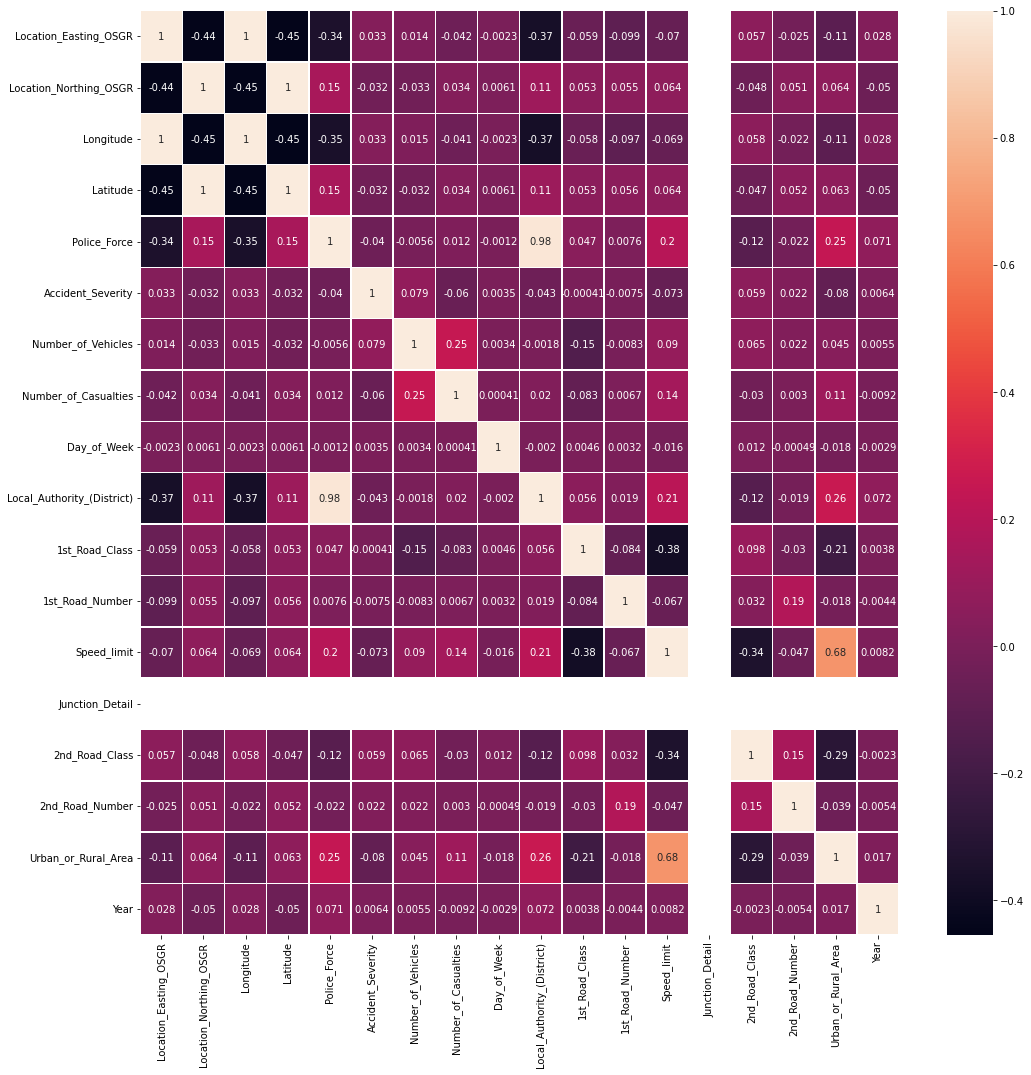

In [ ]:
fig, ax = plt.subplots(figsize=(17,17))   
corr=df.corr()

sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)


* Tous les attributs sont faiblement corrélés à l'exception des couples Local_Authority_(District) et Police_force




In [ ]:
df.isnull().sum()

Accident_Index                                      0
Location_Easting_OSGR                               0
Location_Northing_OSGR                              0
Longitude                                           0
Latitude                                            0
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                               13
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                                         0
Junction_Detail             

* Présence d'attributs ayant des valeurs NULL d'ou le passage à l'étape du cleaning 
# **2- Data preparation**
## **2-1- Data cleaning**
d'aprés la cellule précédente, les attributs Junction_Detail, Junction_Control et LSOA_of_Accident_Location posséde un grand nombre de valeurs nulles ( **Missing values** ) (de 10% jusqu'à 70% des valeurs des attributs sont nulles) donc il est nécessaire d'éliminer ces attributs 




In [ ]:
df.drop('Junction_Detail',axis=1,inplace = True)
df.drop('Junction_Control',axis=1,inplace = True)
df.drop('LSOA_of_Accident_Location',axis=1,inplace = True)       


Certains attributs, d'àpres leurs description, sont considéres comme **irrelevent**. Dans notre cas, les attributs Accident_Index, Local_Authority_(District),Local_Authority_(Highway) et Did_Police_Officer_Attend_Scene_of_Accident ne contribue pas à la prédiction des accidents donc il est préferé de les supprimer. \\
Pour les attributs Time et Date on parle de **redundant attributs** car Year et Day_of_Week donne les mm informations que ces attributs => Supprimer ces deux attributs

In [ ]:
Irrelevant=["Accident_Index",
                    "Police_Force",
                    "Local_Authority_(District)",
                    "Local_Authority_(Highway)",
                    "Did_Police_Officer_Attend_Scene_of_Accident",
                    "Time",
                    "Date",
                    "1st_Road_Class","2nd_Road_Class"
                   ]
df.drop(Irrelevant,axis=1,inplace = True)       


In [ ]:
df.shape

(464697, 21)

Pour vérifier l'abscence de problemes au niveau des valeurs des attributs, il est nécessaire d'appliquer value_counts()

In [ ]:
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,1st_Road_Number,Road_Type,Speed_limit,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Year
0,527200,178760,-0.169101,51.493429,3,2,1,5,308,Single carriageway,30,0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,2012
1,524930,181430,-0.200838,51.517931,3,2,1,4,412,Single carriageway,30,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,2012
2,525860,178080,-0.188636,51.487618,3,2,1,3,3220,One way street,30,0,None within 50 metres,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,2012
3,524980,181030,-0.200259,51.514325,3,1,1,4,0,Single carriageway,30,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,2012
4,526170,179200,-0.183773,51.497614,3,1,1,3,325,Single carriageway,30,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,2012


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


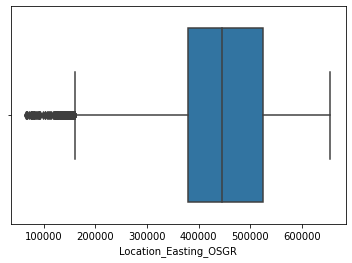

In [ ]:
sns.boxplot(df['Location_Easting_OSGR'])

In [ ]:
df['Road_Type'].value_counts()

Single carriageway    351268
Dual carriageway       65998
Roundabout             31852
One way street          9074
Slip road               4827
Unknown                 1678
Name: Road_Type, dtype: int64

Les **valeurs aberrantes** présente 0.7% du dataset donc on peut supprimer ces observations

In [ ]:
df = df.loc[df['Location_Easting_OSGR'] >=200000]

In [ ]:
df.shape

(461359, 21)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


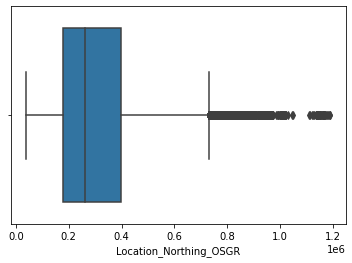

In [ ]:
sns.boxplot(df['Location_Northing_OSGR'])

In [ ]:
dfa = df.copy()
dfa = dfa.loc[dfa['Location_Northing_OSGR'] >750000]
dfa.shape

(4400, 21)

Les **valeurs aberrantes** présente 0.7% du dataset donc on peut supprimer ces observations

In [ ]:
df = df.loc[df['Location_Northing_OSGR'] <=750000]
df.shape

(456959, 21)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


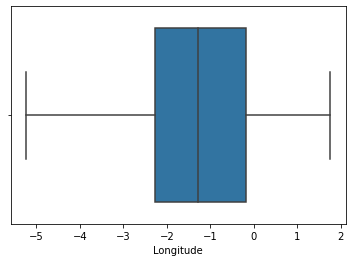

In [ ]:
sns.boxplot(df['Longitude'])

Pas de valeurs aberrantes pour l' attribut Longitude

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


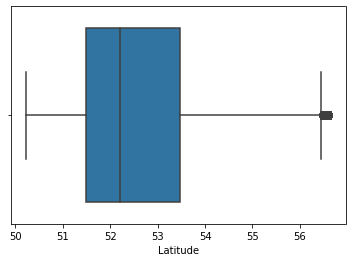

In [ ]:
sns.boxplot(df['Latitude'])

In [ ]:
df = df.loc[df['Latitude'] <=56]
df.shape

(452450, 21)

In [ ]:
df['Accident_Severity'].value_counts()

3    383162
2     64304
1      4984
Name: Accident_Severity, dtype: int64

In [ ]:
df['Number_of_Vehicles'].value_counts() 

2     272659
1     135025
3      34795
4       7485
5       1642
6        510
7        175
8         87
9         30
10        23
11         6
13         4
12         3
18         2
21         1
16         1
19         1
67         1
Name: Number_of_Vehicles, dtype: int64

In [ ]:
df['Number_of_Casualties'].value_counts()

1     352038
2      69054
3      19881
4       7143
5       2635
6       1010
7        320
8        155
9         81
10        40
11        26
12        14
13        10
14         7
17         4
16         4
19         3
15         3
21         2
24         2
29         2
25         2
93         1
87         1
20         1
22         1
23         1
26         1
27         1
33         1
41         1
42         1
46         1
54         1
70         1
18         1
Name: Number_of_Casualties, dtype: int64

In [ ]:
df['Day_of_Week'].value_counts()

6    74086
5    68844
3    68519
4    68051
2    64959
7    59097
1    48894
Name: Day_of_Week, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


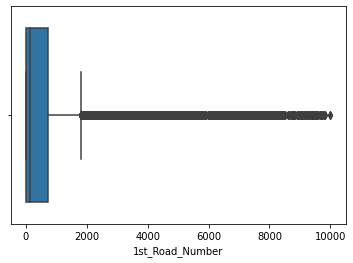

In [ ]:
sns.boxplot(df['1st_Road_Number'])

In [ ]:
dfa = df.copy()
dfa = dfa.loc[dfa['1st_Road_Number'] >2000]
dfa.shape

(82419, 21)

In [ ]:
df['1st_Road_Number'].loc[df['1st_Road_Number'] >= 2000] = df['1st_Road_Number'].median()


In [ ]:
df

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,1st_Road_Number,Road_Type,Speed_limit,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Year
0,527200,178760,-0.169101,51.493429,3,2,1,5,308,Single carriageway,30,0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,2012
1,524930,181430,-0.200838,51.517931,3,2,1,4,412,Single carriageway,30,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,2012
2,525860,178080,-0.188636,51.487618,3,2,1,3,148,One way street,30,0,None within 50 metres,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,2012
3,524980,181030,-0.200259,51.514325,3,1,1,4,0,Single carriageway,30,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,2012
4,526170,179200,-0.183773,51.497614,3,1,1,3,325,Single carriageway,30,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464692,310037,597647,-3.417278,55.264773,2,2,1,1,74,Dual carriageway,70,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,2014
464693,321509,574063,-3.230255,55.054855,3,2,2,5,74,Dual carriageway,70,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,2014
464694,321337,566365,-3.230826,54.985668,3,1,1,3,721,Single carriageway,40,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,2014
464695,323869,566853,-3.191397,54.990446,2,3,2,4,75,Single carriageway,60,43,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,2014


In [ ]:
df['Road_Type'].value_counts()

Single carriageway    341222
Dual carriageway       64823
Roundabout             31217
One way street          8861
Slip road               4763
Unknown                 1564
Name: Road_Type, dtype: int64

Présence d'une classe unknown qui représente 0.3% du dataset => Suppression des observations relaives \\
 ça sera appliqué pour les differents attributs

In [ ]:
df = df.loc[df['Road_Type'] != 'Unknown']
df['Road_Type'].value_counts()

Single carriageway    341222
Dual carriageway       64823
Roundabout             31217
One way street          8861
Slip road               4763
Name: Road_Type, dtype: int64

In [ ]:
df = df.loc[df['Light_Conditions'] != 'Darkness: Street lighting unknown']

In [ ]:
df['Weather_Conditions'].value_counts()

Fine without high winds       358020
Raining without high winds     54361
Other                           7887
Unknown                         7012
Raining with high winds         6730
Fine with high winds            4763
Snowing without high winds      2450
Fog or mist                     2253
Snowing with high winds          662
Name: Weather_Conditions, dtype: int64

In [ ]:
df = df.loc[df['Weather_Conditions'] != 'Unknown']
df = df.loc[df['Weather_Conditions'] != 'Other']



In [ ]:
df['Weather_Conditions'].value_counts()

Fine without high winds       358020
Raining without high winds     54361
Raining with high winds         6730
Fine with high winds            4763
Snowing without high winds      2450
Fog or mist                     2253
Snowing with high winds          662
Name: Weather_Conditions, dtype: int64

In [ ]:
df['Carriageway_Hazards'].value_counts()

None                                       422224
Other object in carriageway                  2800
Any animal (except a ridden horse)           2092
Pedestrian in carriageway (not injured)      1152
Involvement with previous accident            542
Dislodged vehicle load in carriageway         428
Name: Carriageway_Hazards, dtype: int64

In [ ]:
df = df.loc[df['Carriageway_Hazards'] != 'Other object in carriageway']

In [ ]:
df.isnull().sum()

Location_Easting_OSGR                        0
Location_Northing_OSGR                       0
Longitude                                    0
Latitude                                     0
Accident_Severity                            0
Number_of_Vehicles                           0
Number_of_Casualties                         0
Day_of_Week                                  0
1st_Road_Number                              0
Road_Type                                    0
Speed_limit                                  0
2nd_Road_Number                              0
Pedestrian_Crossing-Human_Control            0
Pedestrian_Crossing-Physical_Facilities      0
Light_Conditions                             0
Weather_Conditions                           0
Road_Surface_Conditions                    170
Special_Conditions_at_Site                   1
Carriageway_Hazards                          1
Urban_or_Rural_Area                          0
Year                                         0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Location_Easting_OSGR                      0
Location_Northing_OSGR                     0
Longitude                                  0
Latitude                                   0
Accident_Severity                          0
Number_of_Vehicles                         0
Number_of_Casualties                       0
Day_of_Week                                0
1st_Road_Number                            0
Road_Type                                  0
Speed_limit                                0
2nd_Road_Number                            0
Pedestrian_Crossing-Human_Control          0
Pedestrian_Crossing-Physical_Facilities    0
Light_Conditions                           0
Weather_Conditions                         0
Road_Surface_Conditions                    0
Special_Conditions_at_Site                 0
Carriageway_Hazards                        0
Urban_or_Rural_Area                        0
Year                                       0
dtype: int64

In [ ]:
df.shape

(426268, 21)

In [ ]:
df.drop_duplicates(keep = 'first', inplace=True)

In [ ]:
df.shape

(393770, 21)

## **2-2- Feature engineering**
### **2-2-1 - Categories regrouping**


In [ ]:
df['Road_Type'].value_counts()

Single carriageway    297529
Dual carriageway       56592
Roundabout             27662
One way street          7773
Slip road               4214
Name: Road_Type, dtype: int64

Dans le cas du Road_Type les deux valeurs Single carriageway et One way street correspondent au meme sens => possibilité de réunir ces deux classes.
Présence d'une classe unknown qui représente 0.3% du dataset => Suppression des observations relaives
 ça sera appliqué pour les differents attributs

In [ ]:
df.replace(to_replace ="One way street",  
                 value = "Single carriageway",  
                  inplace = True)

In [ ]:
df['Speed_limit'].value_counts()

30    258184
60     52929
40     32479
70     27426
50     15255
20      7496
10         1
Name: Speed_limit, dtype: int64

In [ ]:
df['Pedestrian_Crossing-Human_Control'].value_counts()

None within 50 metres                 391628
Control by other authorised person      1224
Control by school crossing patrol        918
Name: Pedestrian_Crossing-Human_Control, dtype: int64

In [ ]:
df.replace(to_replace ="Control by school crossing patrol",  
                 value = "Control by other authorised person",  
                  inplace = True)

In [ ]:
df['Pedestrian_Crossing-Human_Control'].value_counts()

None within 50 metres                 391628
Control by other authorised person      2142
Name: Pedestrian_Crossing-Human_Control, dtype: int64

In [ ]:
df['Pedestrian_Crossing-Physical_Facilities'].value_counts()

No physical crossing within 50 meters          318086
Pedestrian phase at traffic signal junction     30337
non-junction pedestrian crossing                23019
Zebra crossing                                  12055
Central refuge                                   8947
Footbridge or subway                             1326
Name: Pedestrian_Crossing-Physical_Facilities, dtype: int64

In [ ]:
df['Light_Conditions'].value_counts()

Daylight: Street light present               294282
Darkness: Street lights present and lit       77989
Darkeness: No street lighting                 19291
Darkness: Street lights present but unlit      2208
Name: Light_Conditions, dtype: int64

In [ ]:
df.replace(to_replace ="Darkness: Street lights present but unlit",  
                 value = "Darkeness: No street lighting",  
                  inplace = True)

In [ ]:
df['Light_Conditions'].value_counts()

Daylight: Street light present             294282
Darkness: Street lights present and lit     77989
Darkeness: No street lighting               21499
Name: Light_Conditions, dtype: int64

In [ ]:
df['Road_Surface_Conditions'].value_counts()

Dry                          275591
Wet/Damp                     109913
Frost/Ice                      5296
Snow                           2277
Flood (Over 3cm of water)       693
Name: Road_Surface_Conditions, dtype: int64

In [ ]:
df['Special_Conditions_at_Site'].value_counts()

None                                               385438
Roadworks                                            3875
Mud                                                  1125
Ol or diesel                                         1116
Road surface defective                                881
Auto traffic singal out                               642
Permanent sign or marking defective or obscured       525
Auto traffic signal partly defective                  168
Name: Special_Conditions_at_Site, dtype: int64

In [ ]:
df['Urban_or_Rural_Area'].value_counts()

1    261212
2    132558
Name: Urban_or_Rural_Area, dtype: int64

In [ ]:
df['Year'].value_counts()

2014    135059
2012    132054
2013    126657
Name: Year, dtype: int64

In [ ]:
df['Pedestrian_Crossing-Human_Control'] = df['Pedestrian_Crossing-Human_Control'].astype('category')

In [ ]:
df['Pedestrian_Crossing-Physical_Facilities'] = df['Pedestrian_Crossing-Physical_Facilities'].astype('category')
df['Light_Conditions'] = df['Light_Conditions'].astype('category')
df['Weather_Conditions'] = df['Weather_Conditions'].astype('category')
df['Road_Surface_Conditions'] = df['Road_Surface_Conditions'].astype('category')
df['Special_Conditions_at_Site'] = df['Special_Conditions_at_Site'].astype('category')
df['Carriageway_Hazards'] = df['Carriageway_Hazards'].astype('category')
df['Urban_or_Rural_Area'] = df['Urban_or_Rural_Area'].astype('category')
df['Year'] = df['Year'].astype('category')

In [ ]:
df['Road_Type'] = df['Road_Type'].astype('category')


In [ ]:
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,1st_Road_Number,Road_Type,Speed_limit,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Year
0,527200,178760,-0.169101,51.493429,3,2,1,5,308,Single carriageway,30,0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,2012
1,524930,181430,-0.200838,51.517931,3,2,1,4,412,Single carriageway,30,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,2012
2,525860,178080,-0.188636,51.487618,3,2,1,3,148,Single carriageway,30,0,None within 50 metres,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,2012
3,524980,181030,-0.200259,51.514325,3,1,1,4,0,Single carriageway,30,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,2012
4,526170,179200,-0.183773,51.497614,3,1,1,3,325,Single carriageway,30,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,2012


### **2-2-2 - One hot encoding for categorical attributes**


In [ ]:
df = pd.get_dummies(df, columns=['Road_Type'])
df = pd.get_dummies(df, columns=['Pedestrian_Crossing-Human_Control'])
df = pd.get_dummies(df, columns=['Pedestrian_Crossing-Physical_Facilities'])
df = pd.get_dummies(df, columns=['Light_Conditions'])
df = pd.get_dummies(df, columns=['Weather_Conditions'])
df = pd.get_dummies(df, columns=['Road_Surface_Conditions'])
df = pd.get_dummies(df, columns=['Special_Conditions_at_Site'])
df = pd.get_dummies(df, columns=['Carriageway_Hazards'])


In [ ]:
df.shape

(393770, 53)

In [ ]:
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,1st_Road_Number,Speed_limit,2nd_Road_Number,Urban_or_Rural_Area,Year,Road_Type_Dual carriageway,Road_Type_Roundabout,Road_Type_Single carriageway,Road_Type_Slip road,Pedestrian_Crossing-Human_Control_Control by other authorised person,Pedestrian_Crossing-Human_Control_None within 50 metres,Pedestrian_Crossing-Physical_Facilities_Central refuge,Pedestrian_Crossing-Physical_Facilities_Footbridge or subway,Pedestrian_Crossing-Physical_Facilities_No physical crossing within 50 meters,Pedestrian_Crossing-Physical_Facilities_Pedestrian phase at traffic signal junction,Pedestrian_Crossing-Physical_Facilities_Zebra crossing,Pedestrian_Crossing-Physical_Facilities_non-junction pedestrian crossing,Light_Conditions_Darkeness: No street lighting,Light_Conditions_Darkness: Street lights present and lit,Light_Conditions_Daylight: Street light present,Weather_Conditions_Fine with high winds,Weather_Conditions_Fine without high winds,Weather_Conditions_Fog or mist,Weather_Conditions_Raining with high winds,Weather_Conditions_Raining without high winds,Weather_Conditions_Snowing with high winds,Weather_Conditions_Snowing without high winds,Road_Surface_Conditions_Dry,Road_Surface_Conditions_Flood (Over 3cm of water),Road_Surface_Conditions_Frost/Ice,Road_Surface_Conditions_Snow,Road_Surface_Conditions_Wet/Damp,Special_Conditions_at_Site_Auto traffic signal partly defective,Special_Conditions_at_Site_Auto traffic singal out,Special_Conditions_at_Site_Mud,Special_Conditions_at_Site_None,Special_Conditions_at_Site_Ol or diesel,Special_Conditions_at_Site_Permanent sign or marking defective or obscured,Special_Conditions_at_Site_Road surface defective,Special_Conditions_at_Site_Roadworks,Carriageway_Hazards_Any animal (except a ridden horse),Carriageway_Hazards_Dislodged vehicle load in carriageway,Carriageway_Hazards_Involvement with previous accident,Carriageway_Hazards_None,Carriageway_Hazards_Pedestrian in carriageway (not injured)
0,527200,178760,-0.169101,51.493429,3,2,1,5,308,30,0,1,2012,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,524930,181430,-0.200838,51.517931,3,2,1,4,412,30,0,1,2012,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,525860,178080,-0.188636,51.487618,3,2,1,3,148,30,0,1,2012,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,524980,181030,-0.200259,51.514325,3,1,1,4,0,30,0,1,2012,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,526170,179200,-0.183773,51.497614,3,1,1,3,325,30,0,1,2012,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


### **2-2-3 - Scaling and normalization**


Au niveau de cette etape si l'histogramme montre une symétrie on passe à la normalisation minmax() si non on passe au log puis minmax

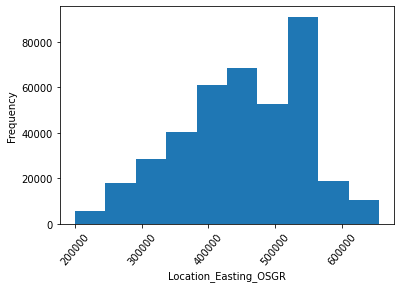

In [ ]:
fig = df['Location_Easting_OSGR'].plot.hist(rot=50)
fig = plt.xlabel('Location_Easting_OSGR')

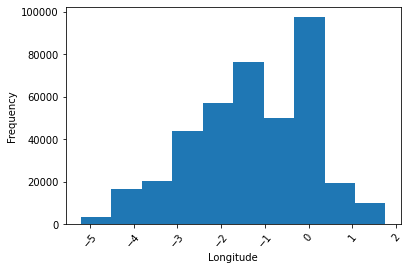

In [ ]:
fig = df['Longitude'].plot.hist(rot=50)
fig = plt.xlabel('Longitude')

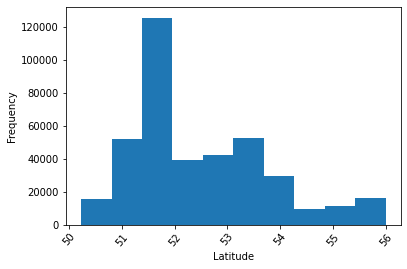

In [ ]:
fig = df['Latitude'].plot.hist(rot=50)
fig = plt.xlabel('Latitude')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [ ]:
df['Location_Easting_OSGR'] = mms.fit_transform(df[['Location_Easting_OSGR']])
df['Location_Northing_OSGR'] = mms.fit_transform(df[['Location_Northing_OSGR']])
df['Longitude'] = mms.fit_transform(df[['Longitude']])
df['Latitude'] = mms.fit_transform(df[['Latitude']])
df['Number_of_Vehicles'] = mms.fit_transform(df[['Number_of_Vehicles']])
df['Number_of_Casualties'] = mms.fit_transform(df[['Number_of_Casualties']])

df['Day_of_Week'] = mms.fit_transform(df[['Day_of_Week']])
df['1st_Road_Number'] = mms.fit_transform(df[['1st_Road_Number']])
df['Speed_limit'] = mms.fit_transform(df[['Speed_limit']])
df['2nd_Road_Number'] = mms.fit_transform(df[['2nd_Road_Number']])
df['Year'] = mms.fit_transform(df[['Year']])



In [ ]:
df['Urban_or_Rural_Area'] = mms.fit_transform(df[['Urban_or_Rural_Area']])


In [ ]:
df

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,1st_Road_Number,Speed_limit,2nd_Road_Number,Urban_or_Rural_Area,Year,Road_Type_Dual carriageway,Road_Type_Roundabout,Road_Type_Single carriageway,Road_Type_Slip road,Pedestrian_Crossing-Human_Control_Control by other authorised person,Pedestrian_Crossing-Human_Control_None within 50 metres,Pedestrian_Crossing-Physical_Facilities_Central refuge,Pedestrian_Crossing-Physical_Facilities_Footbridge or subway,Pedestrian_Crossing-Physical_Facilities_No physical crossing within 50 meters,Pedestrian_Crossing-Physical_Facilities_Pedestrian phase at traffic signal junction,Pedestrian_Crossing-Physical_Facilities_Zebra crossing,Pedestrian_Crossing-Physical_Facilities_non-junction pedestrian crossing,Light_Conditions_Darkeness: No street lighting,Light_Conditions_Darkness: Street lights present and lit,Light_Conditions_Daylight: Street light present,Weather_Conditions_Fine with high winds,Weather_Conditions_Fine without high winds,Weather_Conditions_Fog or mist,Weather_Conditions_Raining with high winds,Weather_Conditions_Raining without high winds,Weather_Conditions_Snowing with high winds,Weather_Conditions_Snowing without high winds,Road_Surface_Conditions_Dry,Road_Surface_Conditions_Flood (Over 3cm of water),Road_Surface_Conditions_Frost/Ice,Road_Surface_Conditions_Snow,Road_Surface_Conditions_Wet/Damp,Special_Conditions_at_Site_Auto traffic signal partly defective,Special_Conditions_at_Site_Auto traffic singal out,Special_Conditions_at_Site_Mud,Special_Conditions_at_Site_None,Special_Conditions_at_Site_Ol or diesel,Special_Conditions_at_Site_Permanent sign or marking defective or obscured,Special_Conditions_at_Site_Road surface defective,Special_Conditions_at_Site_Roadworks,Carriageway_Hazards_Any animal (except a ridden horse),Carriageway_Hazards_Dislodged vehicle load in carriageway,Carriageway_Hazards_Involvement with previous accident,Carriageway_Hazards_None,Carriageway_Hazards_Pedestrian in carriageway (not injured)
0,0.718481,0.218786,0.723184,0.219725,3,0.015152,0.00000,0.666667,0.154077,0.333333,0.0001,0.0,0.0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0.713495,0.222923,0.718628,0.223967,3,0.015152,0.00000,0.500000,0.206103,0.333333,0.0001,0.0,0.0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,0.715538,0.217732,0.720380,0.218719,3,0.015152,0.00000,0.333333,0.074037,0.333333,0.0001,0.0,0.0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,0.713605,0.222303,0.718711,0.223343,3,0.000000,0.00000,0.500000,0.000000,0.333333,0.0001,0.0,0.0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0.716219,0.219468,0.721078,0.220449,3,0.000000,0.00000,0.333333,0.162581,0.333333,0.0001,0.0,0.0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464692,0.241493,0.867905,0.256938,0.872702,2,0.015152,0.00000,0.000000,0.037019,1.000000,0.0001,1.0,1.0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
464693,0.266691,0.831359,0.283783,0.836356,3,0.015152,0.01087,0.666667,0.037019,1.000000,0.0001,1.0,1.0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
464694,0.266313,0.819430,0.283701,0.824377,3,0.000000,0.00000,0.333333,0.360680,0.500000,0.0001,1.0,1.0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
464695,0.271874,0.820186,0.289361,0.825204,2,0.030303,0.01087,0.500000,0.037519,0.833333,0.0044,1.0,1.0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


In [ ]:
df.isnull().sum()

Location_Easting_OSGR                                                                  0
Location_Northing_OSGR                                                                 0
Longitude                                                                              0
Latitude                                                                               0
Accident_Severity                                                                      0
Number_of_Vehicles                                                                     0
Number_of_Casualties                                                                   0
Day_of_Week                                                                            0
1st_Road_Number                                                                        0
Speed_limit                                                                            0
2nd_Road_Number                                                                        0
Urban_or_Rural_Area  

### **2-2-4 - Data balancing**


Text(0.5, 1.0, 'Accident severity')

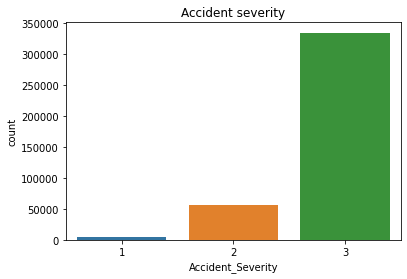

In [ ]:
class_distribution = df['Accident_Severity'].value_counts()

sns.countplot(x='Accident_Severity',data= df)
plt.title ('Accident severity')

In [ ]:
df['Accident_Severity'].value_counts()


3    333825
2     55562
1      4383
Name: Accident_Severity, dtype: int64

In [ ]:
df1 = df.loc[df['Accident_Severity'] == 1]
df2 = df.loc[df['Accident_Severity'] == 2]
df3 = df.loc[df['Accident_Severity'] == 3]


In [ ]:
df2 = df2[:12000]
df3 = df3[:12000]

In [ ]:
df = pd.concat([df1,df2,df3])
df = df.sample(frac=1, axis=1).reset_index(drop=True)


In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
X = df.drop(['Accident_Severity'],axis = 1).values
y = df['Accident_Severity'].values

In [ ]:
X, y = sm.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from collections import Counter
Counter(y)

Counter({1: 12000, 2: 12000, 3: 12000})

# **3- Training and Evaluating Machine Learning Model**


In [ ]:
#Split_train_test_validation
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42 , shuffle =True)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42,shuffle =True)

X_train.shape,X_val.shape,X_test.shape,y_train.shape,y_val.shape,y_test.shape

((21600, 52), (5400, 52), (9000, 52), (21600,), (5400,), (9000,))

### **3-1 - KNN classifier**
### **3-1-1 - Training**


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer,recall_score,

In [ ]:

knn = KNeighborsClassifier()
knn_params = {'n_neighbors' : range(1,20)}
scorer = make_scorer(recall_score, average = 'weighted')
knn_classifier = GridSearchCV(knn,knn_params,cv=10,scoring=scorer)
knn_classifier.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 20)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False,
             scoring=make_scorer(recall_score, average=weighted), verbose=0)

In [ ]:
knn_classifier.best_params_,knn_classifier.best_score_

({'n_neighbors': 3}, 0.8099537037037037)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

best_knn = KNeighborsClassifier(n_neighbors = 3)
best_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

### **3-1-2 - Evaluation**


              precision    recall  f1-score   support

           1       0.93      0.94      0.94      7223
           2       0.92      0.78      0.84      7134
           3       0.85      0.96      0.90      7243

    accuracy                           0.90     21600
   macro avg       0.90      0.89      0.89     21600
weighted avg       0.90      0.90      0.89     21600

[[6816  304  103]
 [ 438 5554 1142]
 [  73  201 6969]]


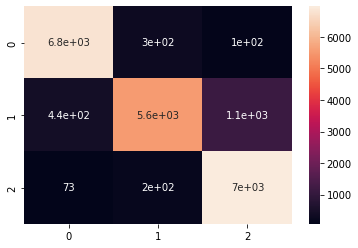

In [ ]:
knn_predict = best_knn.predict(X_train)
cmG = confusion_matrix(y_train,knn_predict)
sns.heatmap(cmG,annot=True)

print(classification_report(y_train,knn_predict))
print(confusion_matrix(y_train,knn_predict))

              precision    recall  f1-score   support

           1       0.87      0.87      0.87      1751
           2       0.80      0.67      0.73      1838
           3       0.78      0.90      0.84      1811

    accuracy                           0.81      5400
   macro avg       0.82      0.82      0.81      5400
weighted avg       0.81      0.81      0.81      5400

[[1532  168   51]
 [ 205 1227  406]
 [  28  147 1636]]


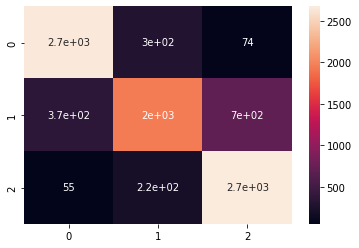

In [ ]:

knn_predict = best_knn.predict(X_val)
cmG_val = confusion_matrix(y_val,knn_predict)
sns.heatmap(cmG,annot=True)

print(classification_report(y_val,knn_predict))
print(cmG_val)

              precision    recall  f1-score   support

           1       0.86      0.88      0.87      3026
           2       0.79      0.65      0.71      3028
           3       0.78      0.91      0.84      2946

    accuracy                           0.81      9000
   macro avg       0.81      0.81      0.81      9000
weighted avg       0.81      0.81      0.81      9000

[[2654  298   74]
 [ 370 1957  701]
 [  55  218 2673]]


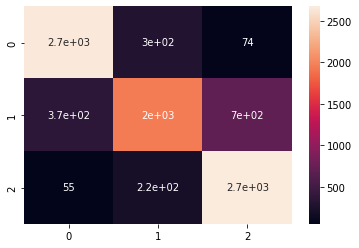

In [ ]:

knn_predict = best_knn.predict(X_test)
cmG_test = confusion_matrix(y_test,knn_predict)
sns.heatmap(cmG_test,annot=True)

print(classification_report(y_test,knn_predict))
print(cmG_test)

In [ ]:
y_scores_val = best_knn.predict_proba(X_val)

In [ ]:
y_scores_val

array([[1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.33333333, 0.66666667],
       ...,
       [1.        , 0.        , 0.        ],
       [0.33333333, 0.        , 0.66666667],
       [0.66666667, 0.33333333, 0.        ]])

In [ ]:
y_scores = best_knn.predict_proba(X_test)

In [ ]:
y_scores

array([[0.        , 0.        , 1.        ],
       [0.        , 0.33333333, 0.66666667],
       [0.        , 0.        , 1.        ],
       ...,
       [0.33333333, 0.66666667, 0.        ],
       [1.        , 0.        , 0.        ],
       [0.33333333, 0.66666667, 0.        ]])

A partir de l'évaluation il s'est avéré que l'accuracy est de 81% => bonne mais on peut l'améliorer parce que à partir de la matrice de confusion il y'a des accidents severes qui sont déclarés comme non sévere ce qui peut donner des résultats fauuses pour l'analyse des risques des accidents.
Aussi qu'à partir des résultats des probas il y'a des observations ou la certitude est egale à 0.67 ce qui n'est pas optimal

In [ ]:
# save model 
import pickle
pickle.dump(best_knn, open('model_3nn.pickle', 'wb')) 

### **3-2 - SVM**
### **3-2-1 - Training and evaluation**
#### **3-2-1-1 -RBF Kernel**


In [ ]:
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV

In [ ]:
svc_model =SVC()
svc_params = {"C":[0.1,1,5,10],"gamma":[0.01,0.1,1,10,100,1000],"kernel":['rbf']}
scorer = make_scorer(recall_score, average = 'weighted')
svc_classifier = GridSearchCV(svc_model,svc_params,cv=10,scoring=scorer)
svc_classifier.fit(X_train,y_train)

svc_classifier.best_params_,knn_classifier.best_score_

({'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}, 0.8099537037037037)

In [ ]:
svc_model =SVC(C=10,gamma=0.1,kernel='rbf',probability=True)
svc_model.fit(X_train,y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

              precision    recall  f1-score   support

           1       0.95      0.79      0.86      1751
           2       0.82      0.73      0.77      1838
           3       0.78      0.99      0.87      1811

    accuracy                           0.84      5400
   macro avg       0.85      0.84      0.84      5400
weighted avg       0.85      0.84      0.84      5400



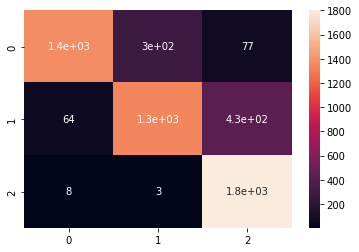

In [ ]:
y_predict = svc_model.predict(X_val)
cmG = confusion_matrix(y_val,y_predict)
sns.heatmap(cmG,annot=True)
print(classification_report(y_val,y_predict))

              precision    recall  f1-score   support

           1       0.96      0.79      0.87      3026
           2       0.81      0.72      0.76      3028
           3       0.77      0.99      0.87      2946

    accuracy                           0.83      9000
   macro avg       0.85      0.83      0.83      9000
weighted avg       0.85      0.83      0.83      9000



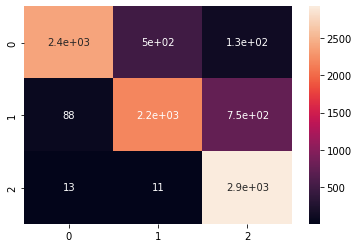

In [ ]:
y_predict = svc_model.predict(X_test)
cmG = confusion_matrix(y_test,y_predict)
sns.heatmap(cmG,annot=True)
print(classification_report(y_test,y_predict))

In [ ]:
y_scores_test = svc_model.predict_proba(X_test)
y_scores_test

array([[1.21133604e-01, 3.28678400e-01, 5.50187996e-01],
       [2.68535526e-02, 1.68280607e-01, 8.04865840e-01],
       [2.05119023e-02, 1.76977596e-01, 8.02510502e-01],
       ...,
       [1.49777723e-01, 8.50147527e-01, 7.47505601e-05],
       [9.99999752e-01, 1.97087260e-07, 5.06556620e-08],
       [1.40714167e-01, 8.59236089e-01, 4.97438615e-05]])

In [ ]:
y_scores_val = svc_model.predict_proba(X_test)
y_scores_val

array([[1.21133604e-01, 3.28678400e-01, 5.50187996e-01],
       [2.68535526e-02, 1.68280607e-01, 8.04865840e-01],
       [2.05119023e-02, 1.76977596e-01, 8.02510502e-01],
       ...,
       [1.49777723e-01, 8.50147527e-01, 7.47505601e-05],
       [9.99999752e-01, 1.97087260e-07, 5.06556620e-08],
       [1.40714167e-01, 8.59236089e-01, 4.97438615e-05]])

In [ ]:
import pickle
pickle.dump(best_knn, open('model_svm_rbf.pickle', 'wb')) 

#### **3-2-1-2 -Polynomial Kernel**


In [ ]:
svc_model =SVC()
svc_params = {"C":[0.1,1,5,10],"degree":[2,3,4],"kernel":['poly']}
scorer = make_scorer(recall_score, average = 'weighted')
svc_classifier = GridSearchCV(svc_model,svc_params,cv=10,scoring=scorer)
svc_classifier.fit(X_train,y_train)

svc_classifier.best_params_,knn_classifier.best_score_

({'C': 5, 'degree': 3, 'kernel': 'poly'}, 0.8099537037037037)

In [ ]:
svc_model =SVC(C=5,degree=3,kernel='poly',probability=True)
svc_model.fit(X_train,y_train)

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

              precision    recall  f1-score   support

           1       0.95      0.79      0.86      1751
           2       0.82      0.73      0.77      1838
           3       0.78      0.99      0.87      1811

    accuracy                           0.84      5400
   macro avg       0.85      0.84      0.83      5400
weighted avg       0.85      0.84      0.83      5400

[[1378  297   76]
 [  71 1338  429]
 [   8    5 1798]]


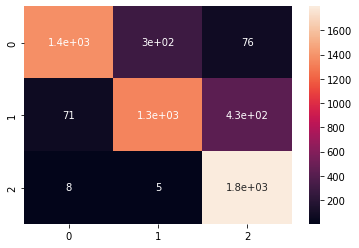

In [ ]:
y_predict = svc_model.predict(X_val)
cmG = confusion_matrix(y_val,y_predict)
sns.heatmap(cmG,annot=True)

print(classification_report(y_val,y_predict))
print(confusion_matrix(y_val,y_predict))

              precision    recall  f1-score   support

           1       0.96      0.79      0.87      3026
           2       0.81      0.72      0.76      3028
           3       0.77      0.99      0.87      2946

    accuracy                           0.83      9000
   macro avg       0.84      0.83      0.83      9000
weighted avg       0.85      0.83      0.83      9000

[[2399  495  132]
 [ 100 2180  748]
 [  12   13 2921]]


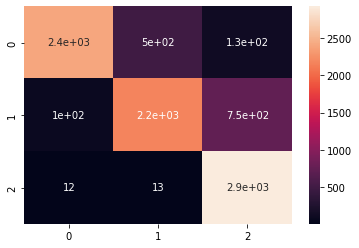

In [ ]:

y_predict = svc_model.predict(X_test)
cmG = confusion_matrix(y_test,y_predict)
sns.heatmap(cmG,annot=True)

print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))

In [ ]:
y_scores_val = svc_model.predict_proba(X_test)
y_scores_val

array([[1.17913243e-01, 3.38950333e-01, 5.43136424e-01],
       [2.76330339e-02, 1.68458001e-01, 8.03908966e-01],
       [1.88250160e-02, 1.75281932e-01, 8.05893052e-01],
       ...,
       [5.64264227e-02, 9.43536250e-01, 3.73268615e-05],
       [9.99999850e-01, 9.99986321e-08, 5.03722106e-08],
       [1.45181834e-01, 8.54761040e-01, 5.71259197e-05]])

Il s'est avéré que le probléme à traiter dans notre cas est 
- Avoir des probabilité > 0.8 pour dire que le modéle est sur de lui
- Minimiser les fautes de prédiction entre : - 0 et 1 /  - 1 et 2

Il est à noter que l SVC est plus performant que le KNN en terme d'accuracy, recall et precision . \\
Au niveau du SVC celui du polynomial est plus performant car il a mieux traiter la minimisation des fautes de prédictions entre 0-1 et 1-2

In [ ]:
pickle.dump(best_knn, open('model_svm_poly.pickle', 'wb')) 

### **3-3 - MLP classifier**


In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:

mlp = MLPClassifier(max_iter=75)
scorer = make_scorer(recall_score, average = 'weighted')
parameter_space = {
    'hidden_layer_sizes':[(50,50,50),(50,100,50),(100,)],
    'activation':['tanh','relu'],
    'alpha':[0.0001,0.05]
}
clf= GridSearchCV(mlp,parameter_space,n_jobs=-1,cv=10,scoring=scorer)
clf.fit(X_train,y_train)
print('bestparameters found :\n',clf.best_params_)

bestparameters found :
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50)}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
best_mlp = MLPClassifier(max_iter=200,activation='relu',alpha=0.0001,hidden_layer_sizes=(50,50,50))
best_mlp.fit(X_train,y_train)



MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

              precision    recall  f1-score   support

           1       0.94      0.81      0.87      1751
           2       0.78      0.79      0.79      1838
           3       0.83      0.93      0.88      1811

    accuracy                           0.84      5400
   macro avg       0.85      0.84      0.85      5400
weighted avg       0.85      0.84      0.84      5400

[[1422  284   45]
 [  78 1449  311]
 [   5  115 1691]]


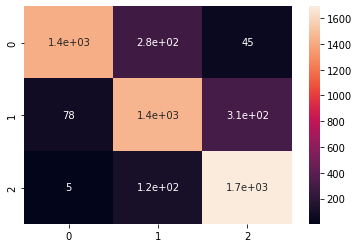

In [ ]:
y_predict = best_mlp.predict(X_val)
cmG = confusion_matrix(y_val,y_predict)
sns.heatmap(cmG,annot=True)

print(classification_report(y_val,y_predict))
print(confusion_matrix(y_val,y_predict))

              precision    recall  f1-score   support

           1       0.95      0.82      0.88      3026
           2       0.78      0.78      0.78      3028
           3       0.82      0.94      0.87      2946

    accuracy                           0.84      9000
   macro avg       0.85      0.85      0.85      9000
weighted avg       0.85      0.84      0.84      9000

[[2485  480   61]
 [ 118 2350  560]
 [   5  172 2769]]


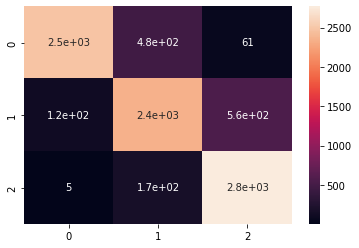

In [ ]:
y_predict = best_mlp.predict(X_test)
cmG = confusion_matrix(y_test,y_predict)
sns.heatmap(cmG,annot=True)

print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))

In [ ]:
dupl

array([[2.43674960e-002, 3.03851131e-001, 6.71781373e-001],
       [9.44910055e-003, 9.65687362e-002, 8.93982163e-001],
       [1.73681673e-003, 6.69882494e-002, 9.31274934e-001],
       ...,
       [2.79066603e-014, 1.00000000e+000, 9.23183856e-037],
       [1.00000000e+000, 6.05395278e-141, 2.00407976e-223],
       [8.23739454e-002, 9.17626055e-001, 5.45318758e-036]])

### **3-4 - Random forest**


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier()

from pprint import pprint
print('parameters currently in use : \n')
pprint(rf.get_params())

parameters currently in use : 

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [ ]:
n_estimators = [200,300]
max_features = [3,5]
max_depth = [2,4]
min_samples_split = [2,5]
min_samples_leaf=[1,4]
bootstrap = [True,False]
param_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf,
              'bootstrap':bootstrap

             }
print(param_grid)

{'n_estimators': [200, 300], 'max_features': [3, 5], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 4], 'bootstrap': [True, False]}


In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(rf,param_grid,cv=3,n_jobs=-1)
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 4,
 'max_features': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [ ]:
rf =RandomForestClassifier(n_estimators=300,max_depth=4,min_samples_split=2,min_samples_leaf=1,max_features=5,bootstrap=False)

In [ ]:
rf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

              precision    recall  f1-score   support

           1       0.88      0.82      0.85      1751
           2       0.86      0.69      0.76      1838
           3       0.78      1.00      0.88      1811

    accuracy                           0.83      5400
   macro avg       0.84      0.83      0.83      5400
weighted avg       0.84      0.83      0.83      5400

[[1435  201  115]
 [ 184 1261  393]
 [   4    3 1804]]


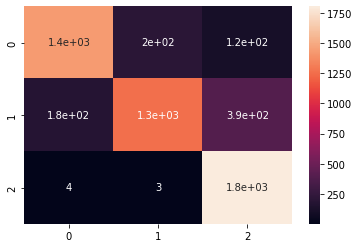

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
rf_predict = rf.predict(X_val)
cmG = confusion_matrix(y_val,rf_predict)
sns.heatmap(cmG,annot=True)
print(classification_report(y_val,rf_predict))
print(confusion_matrix(y_val,rf_predict))

              precision    recall  f1-score   support

           1       0.89      0.81      0.85      3026
           2       0.85      0.68      0.75      3028
           3       0.77      1.00      0.87      2946

    accuracy                           0.83      9000
   macro avg       0.84      0.83      0.82      9000
weighted avg       0.84      0.83      0.82      9000

[[2462  365  199]
 [ 286 2057  685]
 [   7    4 2935]]


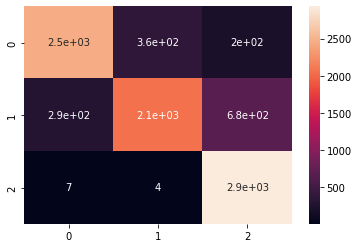

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
rf_predict = rf.predict(X_test)
cmG = confusion_matrix(y_test,rf_predict)
sns.heatmap(cmG,annot=True)
print(classification_report(y_test,rf_predict))
print(confusion_matrix(y_test,rf_predict))

In [ ]:
y_scores_val = rf.predict_proba(X_test)
y_scores_val

array([[0.1720947 , 0.23253585, 0.59536945],
       [0.09287811, 0.20987051, 0.69725138],
       [0.07432791, 0.19307302, 0.73259908],
       ...,
       [0.40085963, 0.57114016, 0.0280002 ],
       [0.77231216, 0.20924184, 0.018446  ],
       [0.30530436, 0.61554973, 0.07914591]])

### **3-4 - Adaboost**


In [ ]:
from sklearn.metrics import make_scorer,recall_score

from sklearn.ensemble import AdaBoostClassifier
Adb=AdaBoostClassifier()
adb_params = {"base_estimator":[None],"n_estimators":[50,70,100,150],"learning_rate":[1,0.1],"algorithm":['SAMME.R','SAMME'],"random_state":[None,42]}
scorer = make_scorer(recall_score, average = 'weighted')
adb_classifier = GridSearchCV(Adb,adb_params,cv=10,scoring=scorer)
adb_classifier.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['SAMME.R', 'SAMME'],
                         'base_estimator': [None], 'learning_rate': [1, 0.1],
                         'n_estimators': [50, 70, 100, 150],
                         'random_state': [None, 42]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(recall_score, average=weighted), verbose=0)

In [ ]:
adb_classifier.best_params_,adb_classifier.best_score_

({'algorithm': 'SAMME.R',
  'base_estimator': None,
  'learning_rate': 0.1,
  'n_estimators': 70,
  'random_state': None},
 0.8407407407407407)

In [ ]:
best_adb = AdaBoostClassifier(base_estimator=None, n_estimators=70, learning_rate=0.1, algorithm='SAMME.R', random_state=None)
best_adb.fit(X_train,y_train)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=70, random_state=None)

              precision    recall  f1-score   support

           1       0.95      0.77      0.85      1751
           2       0.80      0.76      0.78      1838
           3       0.81      0.99      0.89      1811

    accuracy                           0.84      5400
   macro avg       0.85      0.84      0.84      5400
weighted avg       0.85      0.84      0.84      5400

[[1354  344   53]
 [  68 1388  382]
 [   0   10 1801]]


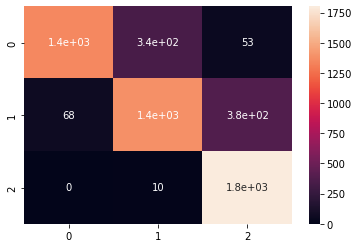

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
adb_predict = best_adb.predict(X_val)
cmG = confusion_matrix(y_val,adb_predict)
sns.heatmap(cmG,annot=True)
print(classification_report(y_val,adb_predict))
print(confusion_matrix(y_val,adb_predict))

              precision    recall  f1-score   support

           1       0.95      0.77      0.85      3026
           2       0.78      0.75      0.76      3028
           3       0.80      0.99      0.89      2946

    accuracy                           0.84      9000
   macro avg       0.85      0.84      0.84      9000
weighted avg       0.85      0.84      0.83      9000

[[2359  455  212]
 [ 130 2212  686]
 [   5    5 2936]]


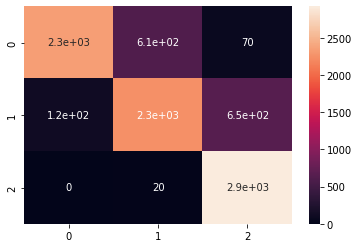

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
adb_predict = best_adb.predict(X_test)
cmG = confusion_matrix(y_test,adb_predict)
sns.heatmap(cmG,annot=True)
print(classification_report(y_test,adb_predict))
print(confusion_matrix(y_test,rf_predict))

In [ ]:
y_scores_val = best_adb.predict_proba(X_test)
y_scores_val

array([[0.22158492, 0.33898082, 0.43943426],
       [0.220361  , 0.33824881, 0.44139019],
       [0.220361  , 0.33824881, 0.44139019],
       ...,
       [0.48437675, 0.48440421, 0.03121904],
       [0.70225985, 0.27813397, 0.01960618],
       [0.44285665, 0.51889837, 0.03824498]])